Examen Big Data :
El Hadji Bassirou DEME 217897

Exploration de donnees

Importation des librairies utiles

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

Chargement du dataset

In [41]:
dataset_path = "/creditcard.csv"
data = pd.read_csv(dataset_path)

In [42]:
# Examinez les premières lignes
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [43]:
# Statistiques descriptives
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [44]:
# Distribution des classes
data['Class'].value_counts()

Class
0.0    3970
1.0       2
Name: count, dtype: int64

Dimension du dataframe

In [45]:
d = data.ndim
print("Le dataframe est de dimensions", d)

Le dataframe est de dimensions 2


Nombre de lignes et de colonnes du dataframe

In [46]:
print("Le dataframe compte", data.shape[0] ,"lignes et", data.shape[1] ,"colonnes.")

Le dataframe compte 3973 lignes et 31 colonnes.


Vue sur les types de variables du dataframe

In [47]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

Nombre de types de variables du dataframe

In [48]:
data.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

Verification de donnees manquantes

In [49]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

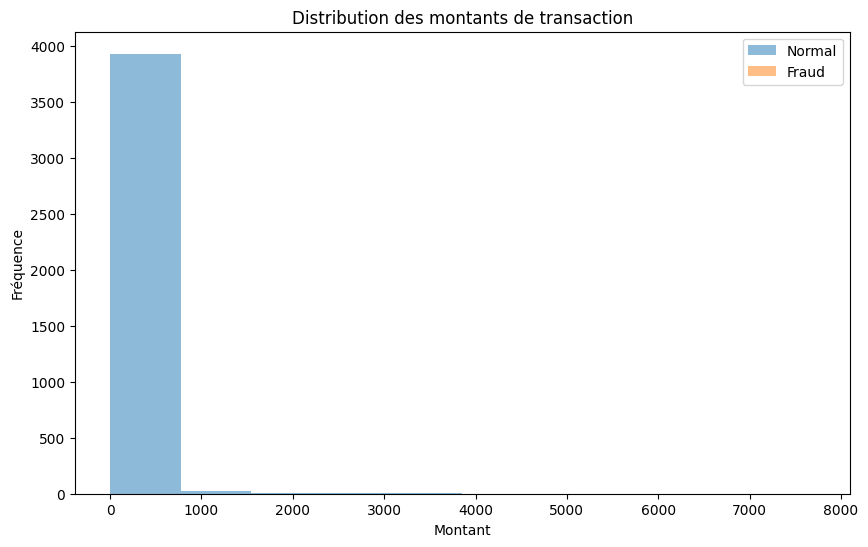

In [50]:
# Histogramme des montants de transaction pour chaque classe
plt.figure(figsize=(10, 6))
data[data['Class'] == 0]['Amount'].plot(kind='hist', alpha=0.5, label='Normal')
data[data['Class'] == 1]['Amount'].plot(kind='hist', alpha=0.5, label='Fraud')
plt.legend()
plt.title('Distribution des montants de transaction')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()


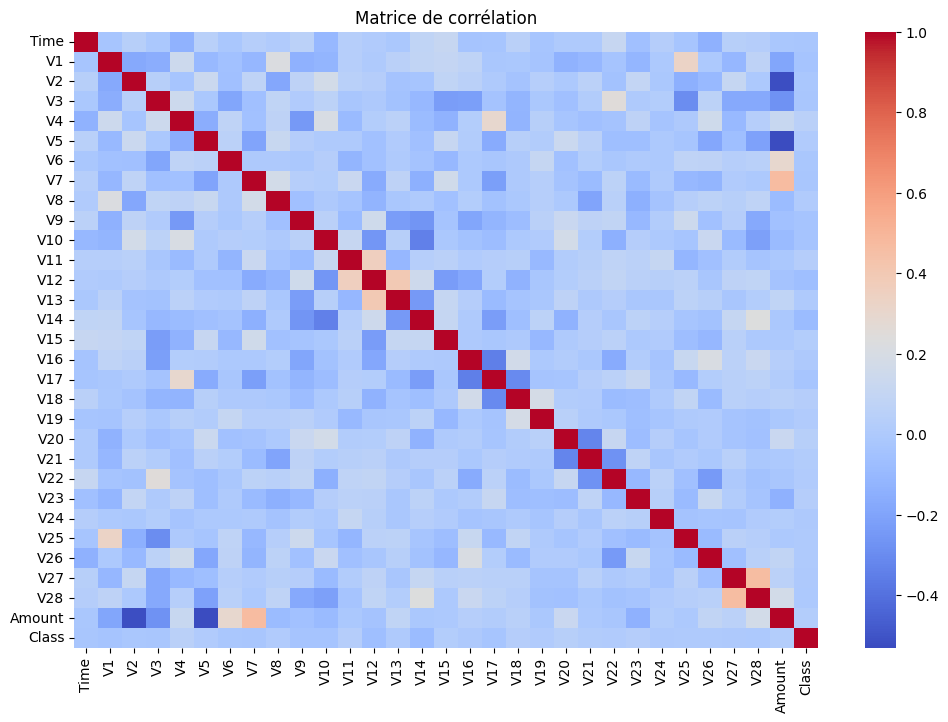

In [51]:
# Matrice de corrélation
correlation_matrix = data.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [70]:
# Gestion des valeurs manquantes
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


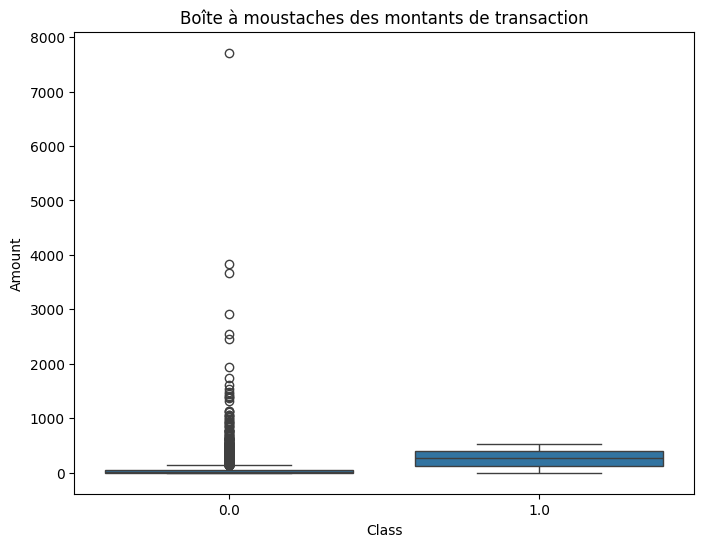

In [71]:
# Boîte à moustaches pour les montants de transaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount',data=data)
plt.title('Boîte à moustaches des montants de transaction')
plt.show()

Pretraitement des donnees

In [88]:
# Séparation en variables explicatives (X) et variable cible (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Suréchantillonnage de la classe minoritaire (fraudes)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'fit_resample'

In [72]:
# Gestion des valeurs manquantes
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [66]:
# Suppression des outliers basés sur le z-score
z_scores = zscore(data[['Time', 'Amount']])
df_no_outliers = data[(z_scores < 3).all(axis=1)]

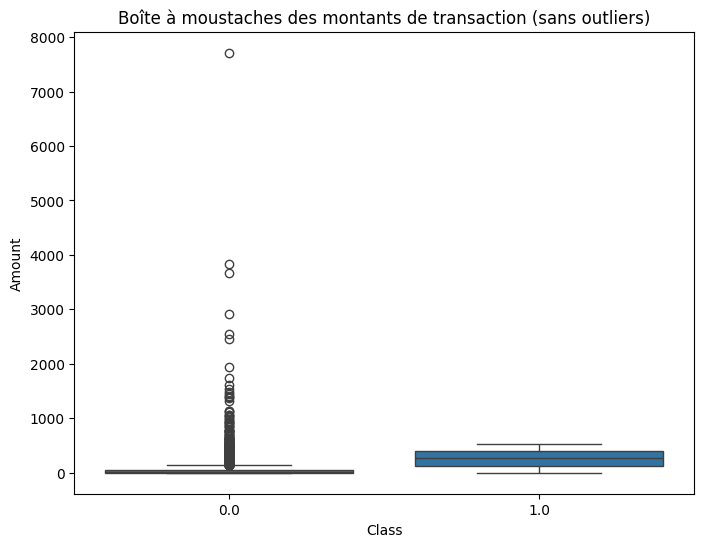

In [68]:
# Boîte à moustaches mise à jour après suppression des outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boîte à moustaches des montants de transaction (sans outliers)')
plt.show()

Modelisation, Entrainement et Evaluation

In [ ]:
# Création du modèle
model = IsolationForest(contamination=0.001, random_state=42)  # contamination représente la proportion d'anomalies attendues

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train_resampled)

In [79]:
# Prédiction sur les données de test
predictions = model.predict(X_test)

# Convertir les prédictions en 0 (normal) et 1 (anomalie)
predictions[predictions == 1] = 0
predictions[predictions == -1] = 1

# Évaluation du modèle
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

print("Classification Report:")
print(classification_report(y_test, predictions))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Courbe précision-rappel (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, predictions)
auc_precision_recall = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC = {auc_precision_recall:.2f}')
plt.title('Courbe Précision-Rappel')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.legend()
plt.show()


NotFittedError: This IsolationForest instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [83]:
# Création de caractéristiques temporelles
data['Hour'] = data['Time'].apply(lambda x: divmod(x, 3600)[0] % 24)
data['DayOfWeek'] = data['Time'].apply(lambda x: divmod(x, 86400)[0] % 7)
data['Month'] = data['Time'].apply(lambda x: divmod(x, 2592000)[0] % 12 + 1)

In [86]:
# Binning des montants de transaction
bins = [-np.inf, 10, 100, 1000, np.inf]
labels = ['Very Small', 'Small', 'Medium', 'Large']
data['AmountCategory'] = pd.cut(data['Amount'], bins=bins, labels=labels)

In [87]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc

# Modèles d'ensemble
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42)),
    # Ajoutez d'autres modèles si nécessaire
]

plt.figure(figsize=(12, 8))

for model_name, model in models:
    # Entraînement sur les données d'entraînement
    model.fit(X_train_resampled, y_train_resampled)

    # Prédiction des probabilités sur les données de test
    y_probs = model.predict_proba(X_test)[:, 1]

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Courbe PR
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # Affichage des courbes dans la même figure
    plt.plot(fpr, tpr, label=f'{model_name} ROC (AUC = {roc_auc:.2f})')
    plt.plot(recall, precision, label=f'{model_name} PR (AUC = {pr_auc:.2f})', linestyle='--')

    # Évaluation du modèle
    predictions = model.predict(X_test)
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, predictions))
    print(f"Confusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, predictions))

# Configuration du graphique
plt.title('Courbes ROC et PR pour différents modèles d\'ensemble')
plt.xlabel('Taux de Faux Positifs (ROC) / Rappel (PR)')
plt.ylabel('Taux de Vrais Positifs (ROC) / Précision (PR)')
plt.legend()
plt.show()


NameError: name 'X_train_resampled' is not defined

<Figure size 1200x800 with 0 Axes>

In [89]:
rf_model =  RandomForestClassifier(n_estimators=100, random_state=42);
rf_model.fit(X_train_resampled, y_train_resampled)
# Prédiction des probabilités sur les données de test
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Ajustement du seuil de décision (par exemple, pour obtenir un rappel de 0.90)
threshold_rf = 0.5
y_pred_rf = (y_probs_rf > threshold_rf).astype(int)

# Évaluation avec le nouveau seuil de décision
print("Classification Report (Random Forest - Adjusted Threshold):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest - Adjusted Threshold):")
print(confusion_matrix(y_test, y_pred_rf))

NameError: name 'X_train_resampled' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42)

# Recherche par grille
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Meilleurs hyperparamètres
best_params_rf = grid_search_rf.best_params_

# Utilisation des meilleurs hyperparamètres
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
# Utilisation du meilleur modèle sur les données de test
y_pred_rf_best = best_rf_model.predict(X_test)

# Évaluation du modèle avec les meilleurs hyperparamètres
print("Classification Report (Random Forest - Best Hyperparameters):")
print(classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix (Random Forest - Best Hyperparameters):")
print(confusion_matrix(y_test, y_pred_rf_best))